In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [11]:
# For static images:
IMAGE_FILES = ['img_data/source.png']

face_landmarks: landmark {
  x: 0.43506214022636414
  y: 0.5937702059745789
  z: -0.06514662504196167
}
landmark {
  x: 0.4104096591472626
  y: 0.5399682521820068
  z: -0.14123360812664032
}
landmark {
  x: 0.4132162630558014
  y: 0.5530899167060852
  z: -0.07496952265501022
}
landmark {
  x: 0.38629162311553955
  y: 0.4783984422683716
  z: -0.10898786783218384
}
landmark {
  x: 0.40878400206565857
  y: 0.5213909149169922
  z: -0.1504986584186554
}
landmark {
  x: 0.40745076537132263
  y: 0.49635738134384155
  z: -0.1415245085954666
}
landmark {
  x: 0.40540438890457153
  y: 0.4360761046409607
  z: -0.07628549635410309
}
landmark {
  x: 0.24182027578353882
  y: 0.43475836515426636
  z: 0.030637165531516075
}
landmark {
  x: 0.4033969044685364
  y: 0.39635515213012695
  z: -0.060146789997816086
}
landmark {
  x: 0.4020775854587555
  y: 0.37388741970062256
  z: -0.06573604047298431
}
landmark {
  x: 0.3980487287044525
  y: 0.2831045389175415
  z: -0.042922139167785645
}
landmark {
  x: 0

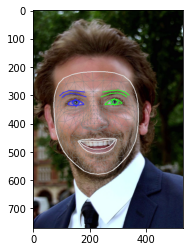

In [16]:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image = image[:,:, ::-1]
    
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    plt.imshow(annotated_image)
#     cv2.imwrite('./result/annotated_image' + str(idx) + '.png', annotated_image)